In [444]:
import requests
import re
from bs4 import BeautifulSoup, Comment


import numpy as np
import pandas as pd
import time

from pymongo import MongoClient
from pprint import pprint


import matplotlib.pyplot as plt
import scipy.stats as stats

# Read in Mongo DB


In [59]:
client = MongoClient()
database = client['NBA_tables']
collection = database['seasons']


In [89]:
res = collection.find({})
ret = list(res)


18

In [106]:
misc_tables = []
for i in ret:
    misc_tables.append(BeautifulSoup(str(ret[i].get('misc_tables')), 'lxml'))
    print(misc_tables)

TypeError: list indices must be integers or slices, not dict

# Beautiful Soup Each Table and Assign to Variable

In [108]:
season_01_misc = BeautifulSoup(str(ret[0].get('misc_tables')), 'lxml') 
season_01_team = BeautifulSoup(str(ret[0].get('team_stats_table')), 'lxml')  
season_01_shoot = BeautifulSoup(str(ret[0].get('shooting_table')), 'lxml') 

season_02_misc = BeautifulSoup(str(ret[1].get('misc_tables')), 'lxml') 
season_02_team = BeautifulSoup(str(ret[1].get('team_stats_table')), 'lxml')  
season_02_shoot = BeautifulSoup(str(ret[1].get('shooting_table')), 'lxml') 

season_03_misc = BeautifulSoup(str(ret[2].get('misc_tables')), 'lxml') 
season_03_team = BeautifulSoup(str(ret[2].get('team_stats_table')), 'lxml')  
season_03_shoot = BeautifulSoup(str(ret[2].get('shooting_table')), 'lxml') 

season_04_misc = BeautifulSoup(str(ret[3].get('misc_tables')), 'lxml') 
season_04_team = BeautifulSoup(str(ret[3].get('team_stats_table')), 'lxml')  
season_04_shoot = BeautifulSoup(str(ret[3].get('shooting_table')), 'lxml') 

season_05_misc = BeautifulSoup(str(ret[4].get('misc_tables')), 'lxml') 
season_05_team = BeautifulSoup(str(ret[4].get('team_stats_table')), 'lxml')  
season_05_shoot = BeautifulSoup(str(ret[4].get('shooting_table')), 'lxml') 

season_06_misc = BeautifulSoup(str(ret[5].get('misc_tables')), 'lxml') 
season_06_team = BeautifulSoup(str(ret[5].get('team_stats_table')), 'lxml')  
season_06_shoot = BeautifulSoup(str(ret[5].get('shooting_table')), 'lxml') 

season_07_misc = BeautifulSoup(str(ret[6].get('misc_tables')), 'lxml') 
season_07_team = BeautifulSoup(str(ret[6].get('team_stats_table')), 'lxml')  
season_07_shoot = BeautifulSoup(str(ret[6].get('shooting_table')), 'lxml') 

season_08_misc = BeautifulSoup(str(ret[7].get('misc_tables')), 'lxml') 
season_08_team = BeautifulSoup(str(ret[7].get('team_stats_table')), 'lxml')  
season_08_shoot = BeautifulSoup(str(ret[7].get('shooting_table')), 'lxml') 

season_09_misc = BeautifulSoup(str(ret[8].get('misc_tables')), 'lxml') 
season_09_team = BeautifulSoup(str(ret[8].get('team_stats_table')), 'lxml')  
season_09_shoot = BeautifulSoup(str(ret[8].get('shooting_table')), 'lxml') 

season_10_misc = BeautifulSoup(str(ret[9].get('misc_tables')), 'lxml') 
season_10_team = BeautifulSoup(str(ret[9].get('team_stats_table')), 'lxml')  
season_10_shoot = BeautifulSoup(str(ret[9].get('shooting_table')), 'lxml') 

season_11_misc = BeautifulSoup(str(ret[10].get('misc_tables')), 'lxml') 
season_11_team = BeautifulSoup(str(ret[10].get('team_stats_table')), 'lxml')  
season_11_shoot = BeautifulSoup(str(ret[10].get('shooting_table')), 'lxml') 

season_12_misc = BeautifulSoup(str(ret[11].get('misc_tables')), 'lxml') 
season_12_team = BeautifulSoup(str(ret[11].get('team_stats_table')), 'lxml')  
season_12_shoot = BeautifulSoup(str(ret[11].get('shooting_table')), 'lxml') 

season_13_misc = BeautifulSoup(str(ret[12].get('misc_tables')), 'lxml') 
season_13_team = BeautifulSoup(str(ret[12].get('team_stats_table')), 'lxml')  
season_13_shoot = BeautifulSoup(str(ret[12].get('shooting_table')), 'lxml') 

season_14_misc = BeautifulSoup(str(ret[13].get('misc_tables')), 'lxml') 
season_14_team = BeautifulSoup(str(ret[13].get('team_stats_table')), 'lxml')  
season_14_shoot = BeautifulSoup(str(ret[13].get('shooting_table')), 'lxml') 

season_15_misc = BeautifulSoup(str(ret[14].get('misc_tables')), 'lxml') 
season_15_team = BeautifulSoup(str(ret[14].get('team_stats_table')), 'lxml')  
season_15_shoot = BeautifulSoup(str(ret[14].get('shooting_table')), 'lxml') 

season_16_misc = BeautifulSoup(str(ret[15].get('misc_tables')), 'lxml') 
season_16_team = BeautifulSoup(str(ret[15].get('team_stats_table')), 'lxml')  
season_16_shoot = BeautifulSoup(str(ret[15].get('shooting_table')), 'lxml') 

season_17_misc = BeautifulSoup(str(ret[16].get('misc_tables')), 'lxml') 
season_17_team = BeautifulSoup(str(ret[16].get('team_stats_table')), 'lxml')  
season_17_shoot = BeautifulSoup(str(ret[16].get('shooting_table')), 'lxml') 

season_18_misc = BeautifulSoup(str(ret[17].get('misc_tables')), 'lxml') 
season_18_team = BeautifulSoup(str(ret[17].get('team_stats_table')), 'lxml')  
season_18_shoot = BeautifulSoup(str(ret[17].get('shooting_table')), 'lxml') 

In [176]:
season_17_shoot

<html><body><div class="table_wrapper setup_commented commented" id="all_team_shooting">
<div class="section_heading">
<span class="section_anchor" data-label="Team Shooting" id="team_shooting_link"></span><h2>Team Shooting</h2> <div class="section_heading_text">
<ul> <li><span class="note">
Shooting data available as of 2000-01 season.
<br/>
Minor differences with official totals may exist.

</span>
</li>
</ul>
</div>
</div>
<div class="placeholder"></div>
<!--
   <div class="table_outer_container">
      <div class="overthrow table_container" id="div_team_shooting">
  <table class="sortable stats_table" id="team_shooting" data-cols-to-freeze=2><caption>Team Shooting Table</caption>
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>
      
      <tr class="over_header">
         <th aria-label="" data-stat="" colspan="18" class=" over_header center" ></th>
     

# Convert HTML to Pandas Dataframes

In [146]:
misc = []
for comment in season_01_misc.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        misc.append(tds)
wdf_misc_01 = pd.DataFrame(misc[2:], columns= misc[1])       
df_misc_01 = wdf_misc_01[['Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%']]



team_stats = []
for comment in season_01_team.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        team_stats.append(tds)
wdf_team_01 = pd.DataFrame(team_stats[1:], columns= team_stats[0])       
df_team_01 = wdf_team_01[['Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS']]


shoot_stats = []
for comment in season_01_shoot.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        shoot_stats.append(tds)
    
wdf_shoot_01 = pd.DataFrame(shoot_stats[3:], columns = shoot_stats[2])
wwdf_shoot_01 = wdf_shoot_01.iloc[:, 0:11]
df_shoot_01 = wwdf_shoot_01[['Team', 'Dist.', '2P' , '0-3', '3-10', '10-16', '16-3pt']]

team_misc = pd.merge(df_misc_01, df_team_01, on='Team', how='outer')
df_season01 = pd.merge(team_misc, df_shoot_01, on='Team', how='outer')

In [147]:
df_season01

,Team,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,16-3pt
0,San Antonio Spurs*,58,106.6,98.0,89.6,.175,.541,.461,1778,1145,1551,7886,11.9,.825,.260,.183,.178,.205
1,Sacramento Kings*,55,105.6,99.6,94.4,.194,.529,.449,1852,1221,1596,8343,11.8,.806,.295,.185,.097,.230
2,Utah Jazz*,53,107.6,102.4,89.8,.135,.546,.471,2110,1296,2107,7959,10.9,.865,.348,.134,.124,.259
3,Dallas Mavericks*,53,107.1,102.6,93.2,.202,.544,.459,1740,1141,1907,8239,12.3,.798,.257,.165,.166,.210
4,Portland Trail Blazers*,50,106.5,101.8,89.1,.165,.539,.468,1963,1257,1745,7824,11.9,.835,.299,.153,.129,.254
5,Los Angeles Lakers*,56,108.4,104.8,91.7,.191,.535,.465,1888,1184,1872,8251,11.9,.809,.285,.186,.137,.201
6,Philadelphia 76ers*,56,103.6,98.9,90.6,.124,.518,.447,1692,1292,1673,7763,10.8,.876,.276,.206,.211,.184
7,Milwaukee Bucks*,52,108.8,104.6,92.1,.218,.542,.458,1844,1123,1928,8260,13.2,.782,.224,.121,.258,.179
8,Houston Rockets,45,106.7,104.2,90.4,.217,.538,.453,1613,1204,1657,7972,12.2,.783,.306,.141,.133,.204
9,Phoenix Suns*,51,100.3,98.0,93.1,.156,.506,.436,1905,1250,1864,7710,11.9,.844,.262,.172,.164,.246


In [322]:
def df_maker(misc, team, shoot): 
    '''
    This function takes in the three beautiful soup objects for a specified year and then joins them together with
    the selected columns.
    
    
    input: 
    misc: Beautiful Soup object for the Miscellaneous table for the desired year
        Columns selected:'Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%'
        
    team: Beautiful Soup object for the Team Stats table for the desired year
        Columns selected: 'Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS'
        
    shoot: Beautiful Soup object for the Shooting table for the desired year
        Columns selected: 'Team', 'Dist.', '2P' , '0-3', '3-10', '10-16'
    
    output: Merged Pandas DataFrame with all the desired statistics for each team
        Columns after join:'Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%', 'FG%', 'AST', 'TOV', 'PF', 'PTS''Dist.', '2P' , '0-3', '3-10', '10-16' 

    
    '''
    misc_list = []
    for comment in misc.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            misc_list.append(tds)
    wdf_misc_01 = pd.DataFrame(misc_list[2:], columns= misc_list[1])       
    df_misc_01 = wdf_misc_01[['Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%']]



    team_stats_list = []
    for comment in team.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            team_stats_list.append(tds)
    wdf_team_01 = pd.DataFrame(team_stats_list[1:], columns= team_stats_list[0])       
    df_team_01 = wdf_team_01[['Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS']]


    shoot_stats = []
    for comment in shoot.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            shoot_stats.append(tds)

    wdf_shoot_01 = pd.DataFrame(shoot_stats[3:], columns = shoot_stats[2])
    wwdf_shoot_01 = wdf_shoot_01.iloc[:, 0:11]
    df_shoot_01 = wwdf_shoot_01[['Team', 'Dist.', '2P' , '0-3', '3-10', '10-16']]

    team_misc = pd.merge(df_misc_01, df_team_01, on='Team', how='outer')
    #before_created_columns =  
    full =  pd.merge(team_misc, df_shoot_01, on='Team', how='outer')
    full['Playoffs'] = (full.Team.map(lambda x: 1 if '*' in str(x) else 0))
    fuller =full.set_index(list(df)[0])
    final = fuller.apply(pd.to_numeric)
    return final
    

In [458]:
season_2001 = df_maker(season_01_misc, season_01_team, season_01_shoot)

season_2002 = df_maker(season_02_misc, season_02_team, season_02_shoot)

season_2003 = df_maker(season_03_misc, season_03_team, season_03_shoot)

season_2004 = df_maker(season_04_misc, season_04_team, season_04_shoot)

season_2005 = df_maker(season_05_misc, season_05_team, season_05_shoot)

season_2006 = df_maker(season_06_misc, season_06_team, season_06_shoot)

season_2007 = df_maker(season_07_misc, season_07_team, season_07_shoot)

season_2008 = df_maker(season_08_misc, season_08_team, season_08_shoot)

season_2009 = df_maker(season_09_misc, season_09_team, season_09_shoot)

season_2010 = df_maker(season_10_misc, season_10_team, season_10_shoot)

season_2011 = df_maker(season_11_misc, season_11_team, season_11_shoot)

season_2012 = df_maker(season_12_misc, season_12_team, season_12_shoot)

season_2013 = df_maker(season_13_misc, season_13_team, season_13_shoot)

season_2014 = df_maker(season_14_misc, season_14_team, season_14_shoot)

season_2015 = df_maker(season_15_misc, season_15_team, season_15_shoot)

season_2016 = df_maker(season_16_misc, season_16_team, season_16_shoot)

season_2017 = df_maker(season_17_misc, season_17_team, season_17_shoot)

season_2018 = df_maker(season_18_misc, season_18_team, season_18_shoot)

In [447]:
season_2018


,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,Playoffs
Team,,,,,,,,,,,,,,,,,
Houston Rockets*,65.0,114.7,106.1,97.6,0.502,0.590,0.460,1767,1135,1597,9213,15.0,0.498,0.288,0.103,0.062,1
Toronto Raptors*,59.0,113.8,105.9,97.4,0.377,0.575,0.472,1995,1095,1783,9156,13.2,0.623,0.291,0.160,0.098,1
Golden State Warriors*,58.0,113.6,107.6,99.6,0.339,0.603,0.503,2402,1267,1607,9304,14.0,0.661,0.267,0.111,0.139,1
Utah Jazz*,48.0,108.4,103.9,95.7,0.357,0.564,0.462,1839,1205,1608,8540,13.2,0.643,0.284,0.151,0.100,1
Philadelphia 76ers*,52.0,109.5,105.0,99.8,0.344,0.568,0.472,2221,1353,1811,9004,13.3,0.656,0.272,0.168,0.109,1
Oklahoma City Thunder*,48.0,110.7,107.2,96.7,0.345,0.546,0.453,1750,1147,1653,8844,13.2,0.655,0.315,0.096,0.105,1
Boston Celtics*,55.0,107.6,103.9,96.0,0.357,0.552,0.450,1842,1149,1618,8529,13.7,0.643,0.259,0.158,0.106,1
San Antonio Spurs*,47.0,107.9,104.8,95.0,0.282,0.543,0.457,1868,1078,1408,8424,12.7,0.718,0.261,0.169,0.143,1
Portland Trail Blazers*,49.0,109.1,106.4,96.5,0.324,0.549,0.452,1599,1109,1599,8661,13.0,0.676,0.283,0.155,0.111,1


In [335]:
list_season = [season_2001, season_2002, season_2003, season_2004, season_2005, season_2006, season_2007, season_2008, season_2009,season_2010, season_2011, season_2012, season_2013, season_2014, season_2015, season_2016, season_2017, season_2018]

In [398]:
test_2002 = pd.DataFrame(season_2002.iloc[-1, 1:-4])
test_2003 = pd.DataFrame(season_2003.iloc[-1, 1:-4])
test_2004 = pd.DataFrame(season_2004.iloc[-1, 1:-4])
test_2005 = pd.DataFrame(season_2005.iloc[-1, 1:-4])
test_2006 = pd.DataFrame(season_2006.iloc[-1, 1:-4])
test_2007 = pd.DataFrame(season_2007.iloc[-1, 1:-4])
test_2008 = pd.DataFrame(season_2008.iloc[-1, 1:-4])
test_2009 = pd.DataFrame(season_2009.iloc[-1, 1:-4])
test_2010 = pd.DataFrame(season_2010.iloc[-1, 1:-4])
test_2011 = pd.DataFrame(season_2011.iloc[-1, 1:-4])
test_2012 = pd.DataFrame(season_2012.iloc[-1, 1:-4])
test_2013 = pd.DataFrame(season_2013.iloc[-1, 1:-4])
test_2014 = pd.DataFrame(season_2014.iloc[-1, 1:-4])
test_2015 = pd.DataFrame(season_2015.iloc[-1, 1:-4])
test_2016 = pd.DataFrame(season_2016.iloc[-1, 1:-4])
test_2017 = pd.DataFrame(season_2017.iloc[-1, 1:-4])
test_2018 = pd.DataFrame(season_2018.iloc[-1, 1:-4])

In [399]:
big_test = pd.merge(test_2001, test_2002, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2003, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2004, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2005, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2006, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2007, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2008, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2009, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2010, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2011, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2012, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2013, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2014, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2015, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2016, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2017, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2018, how='outer', left_index=True, right_index=True)


In [400]:
big_test.columns = ['2001', '2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018']
big_test

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ORtg,103.000,104.500,103.600,102.900,106.100,106.200,106.500,107.500,108.300,107.600,107.300,104.600,105.900,106.700,105.600,106.400,108.800,108.600
DRtg,103.000,104.500,103.600,102.900,106.100,106.200,106.500,107.500,108.300,107.600,107.300,104.600,105.900,106.700,105.600,106.400,108.800,108.600
Pace,91.300,90.700,91.000,90.100,90.900,90.500,91.900,92.400,91.700,92.700,92.100,91.300,92.000,93.900,93.900,95.800,96.400,97.300
3PAr,0.170,0.181,0.182,0.187,0.196,0.202,0.213,0.222,0.224,0.222,0.222,0.226,0.243,0.259,0.268,0.285,0.316,0.337
TS%,0.518,0.520,0.519,0.516,0.529,0.536,0.541,0.540,0.544,0.543,0.541,0.527,0.535,0.541,0.534,0.541,0.552,0.556
FG%,0.443,0.445,0.442,0.439,0.447,0.454,0.458,0.457,0.459,0.461,0.459,0.448,0.453,0.454,0.449,0.452,0.457,0.460
AST,1786.000,1798.000,1763.000,1747.000,1745.000,1690.000,1746.000,1784.000,1720.000,1742.000,1763.000,1384.000,1814.000,1804.000,1807.000,1828.000,1855.000,1905.000
TOV,1234.000,1186.000,1223.000,1228.000,1189.000,1182.000,1241.000,1157.000,1151.000,1166.000,1169.000,962.000,1192.000,1201.000,1177.000,1179.000,1144.000,1170.000
PF,1833.000,1741.000,1784.000,1759.000,1856.000,1866.000,1822.000,1724.000,1726.000,1710.000,1698.000,1291.000,1626.000,1697.000,1658.000,1662.000,1632.000,1628.000
PTS,7774.000,7829.000,7797.000,7659.000,7970.000,7955.000,8097.000,8194.000,8196.000,8237.000,8163.000,6353.000,8041.000,8283.000,8201.000,8419.000,8658.000,8719.000


# Plots

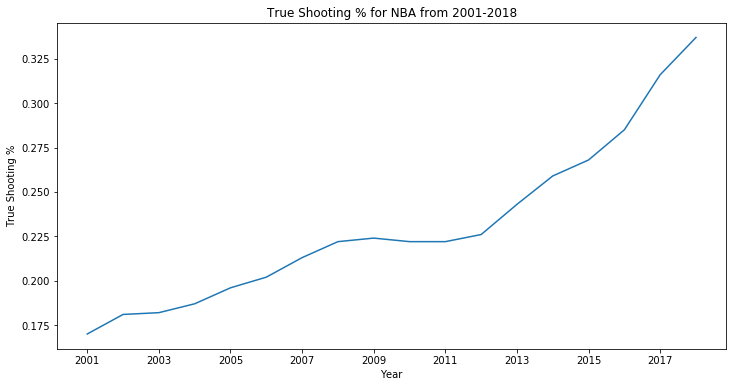

In [466]:
TSP = np.array(big_test.iloc[[3],:])
TSP = TSP.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TSP
lines = ax.plot(x,y)
ax.set(title= 'True Shooting % for NBA from 2001-2018',
      ylabel = 'True Shooting %',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

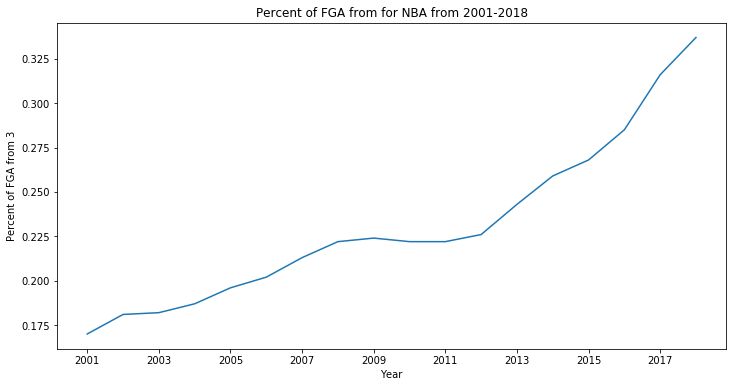

In [467]:
TPAr = np.array(big_test.iloc[[3],:])
TPAr = TPAr.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TPAr
lines = ax.plot(x,y)
ax.set(title= 'Percent of FGA from for NBA from 2001-2018',
      ylabel = 'Percent of FGA from 3',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

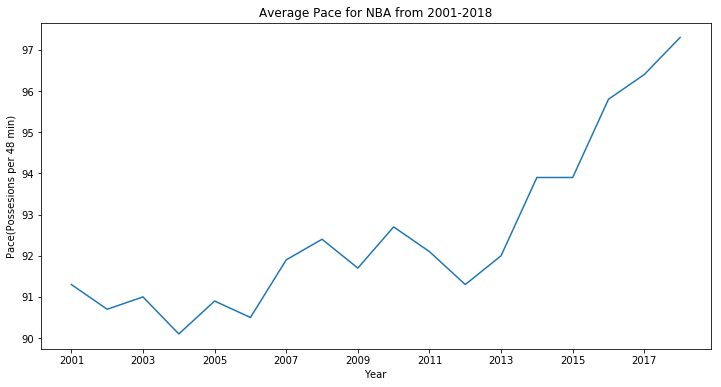

In [468]:
pace = np.array(big_test.iloc[[2],:])
pace = pace.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = pace
lines = ax.plot(x,y)
ax.set(title= 'Average Pace for NBA from 2001-2018',
      ylabel = 'Pace(Possesions per 48 min)',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

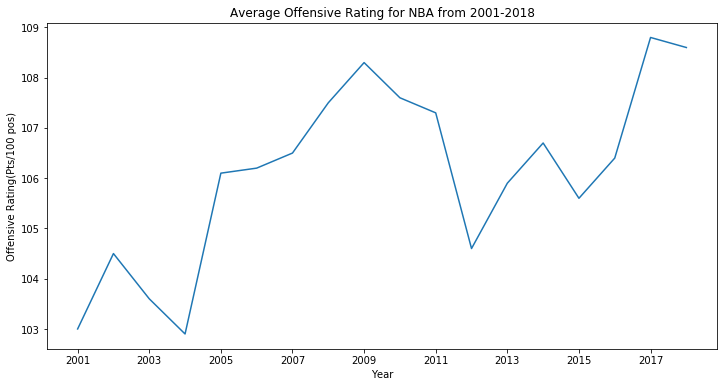

In [469]:
ortg = np.array(big_test.iloc[[0],:])
ortg = ortg.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = ortg
lines = ax.plot(x,y)
ax.set(title= 'Average Offensive Rating for NBA from 2001-2018',
      ylabel = 'Offensive Rating(Pts/100 pos)',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

In [441]:
dist2001 = np.array(season_2001['Dist.'])
dist2018 = np.array(season_2018['Dist.'])

In [442]:
dist2001

array([11.9, 11.8, 10.9, 12.3, 11.9, 11.9, 10.8, 13.2, 12.2, 11.9, 11.9,
       12.5, 13. , 12.8, 12.2, 10.7, 12.6, 12.6, 12.3, 12.2, 11.3, 12.5,
       10.9, 12.9, 11.6, 11.4, 11.3, 11.5, 12. , 12. ])

In [443]:
dist2018

array([15. , 13.2, 14. , 13.2, 13.3, 13.2, 13.7, 12.7, 13. , 12.3, 12.8,
       12.5, 13. , 13.8, 13.4, 11.8, 13.2, 13.2, 13.1, 12.4, 12.4, 14.4,
       12.7, 13.7, 13.3, 13.6, 12.8, 12.9, 13.6, 12.5, 13.2])

# Significance Test for Average FGA distance comparing 2001 to 2018

H0: The average distance of a FGA for 2001 = 2018
Ha: The average distance of a FGA for 2001 is not equal to 2018
alpha: .05

I performed a two sample t-test in order to determine if there is a statistical diference between the average FGA distance in 2001 compared to 2018

In [446]:
stats.ttest_ind(dist2001,dist2018, equal_var = False)

Ttest_indResult(statistic=-7.100547142405033, pvalue=1.85962075145101e-09)

### Based on the results of the t-test(pvalue=1.85962075145101e-09) I can reject the null hypothesis with 95% confidence. 

# Chi Square test 

In [449]:
season_2018

,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,Playoffs
Team,,,,,,,,,,,,,,,,,
Houston Rockets*,65.0,114.7,106.1,97.6,0.502,0.590,0.460,1767,1135,1597,9213,15.0,0.498,0.288,0.103,0.062,1
Toronto Raptors*,59.0,113.8,105.9,97.4,0.377,0.575,0.472,1995,1095,1783,9156,13.2,0.623,0.291,0.160,0.098,1
Golden State Warriors*,58.0,113.6,107.6,99.6,0.339,0.603,0.503,2402,1267,1607,9304,14.0,0.661,0.267,0.111,0.139,1
Utah Jazz*,48.0,108.4,103.9,95.7,0.357,0.564,0.462,1839,1205,1608,8540,13.2,0.643,0.284,0.151,0.100,1
Philadelphia 76ers*,52.0,109.5,105.0,99.8,0.344,0.568,0.472,2221,1353,1811,9004,13.3,0.656,0.272,0.168,0.109,1
Oklahoma City Thunder*,48.0,110.7,107.2,96.7,0.345,0.546,0.453,1750,1147,1653,8844,13.2,0.655,0.315,0.096,0.105,1
Boston Celtics*,55.0,107.6,103.9,96.0,0.357,0.552,0.450,1842,1149,1618,8529,13.7,0.643,0.259,0.158,0.106,1
San Antonio Spurs*,47.0,107.9,104.8,95.0,0.282,0.543,0.457,1868,1078,1408,8424,12.7,0.718,0.261,0.169,0.143,1
Portland Trail Blazers*,49.0,109.1,106.4,96.5,0.324,0.549,0.452,1599,1109,1599,8661,13.0,0.676,0.283,0.155,0.111,1


In [460]:
playoff_teams_2018 = season_2018[season_2018['Playoffs']==1]
nonplayoff_teams_2018 = season_2018[season_2018['Playoffs']==0]
playoff_teams_2017 = season_2017[season_2017['Playoffs']==1]
nonplayoff_teams_2017 = season_2017[season_2017['Playoffs']==0]

In [464]:
pt17_18 = pd.merge(playoff_teams_2017,playoff_teams_2018, how='outer')
npt17_18 = pd.merge(nonplayoff_teams_2017,nonplayoff_teams_2018, how='outer')
npt17_18

,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,Playoffs
0,41.0,107.8,106.7,95.2,0.314,0.541,0.455,1742,1102,1680,8460,13.0,0.686,0.290,0.169,0.094,0
1,40.0,113.2,112.7,98.3,0.329,0.568,0.469,2077,1226,1567,9161,12.8,0.671,0.330,0.156,0.078,0
2,36.0,108.8,108.6,95.7,0.335,0.547,0.442,1891,942,1360,8601,13.9,0.665,0.282,0.133,0.099,0
3,31.0,110.8,112.0,94.6,0.249,0.555,0.467,1940,1150,1646,8657,12.4,0.751,0.304,0.164,0.097,0
4,37.0,106.0,107.1,95.0,0.263,0.521,0.449,1732,973,1467,8309,13.1,0.737,0.250,0.189,0.141,0
5,34.0,105.2,107.4,98.0,0.308,0.539,0.450,1869,1054,1490,8556,13.3,0.692,0.279,0.170,0.094,0
6,33.0,105.6,108.8,92.2,0.366,0.541,0.440,1705,972,1567,8029,15.4,0.634,0.201,0.127,0.116,0
7,32.0,107.3,111.3,94.9,0.291,0.556,0.461,1844,1201,1667,8430,13.1,0.709,0.258,0.195,0.100,0
8,31.0,107.7,111.5,96.0,0.279,0.534,0.447,1786,1139,1668,8556,13.2,0.721,0.291,0.126,0.132,0
9,24.0,106.6,112.2,100.3,0.255,0.538,0.450,1604,1265,2030,8831,12.5,0.745,0.306,0.154,0.120,0


In [ ]:
big_test = pd.merge(test_2001, test_2002, how='outer', left_index=True, right_index=True)